# Oxford Air Pollution Analysis

## Workflow

1) Retreive Data from URL's

2) Combine data into single dataframe

3) Graphs showing variations over the day / week / year

In [1]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import datetime
import matplotlib.pyplot as plt
import calendar as cal
plt.style.use('seaborn')
from reading_workflow.data import clean_data

In [2]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2017.csv')
data_2016 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2016.csv')

(0, 153.86705584351498)

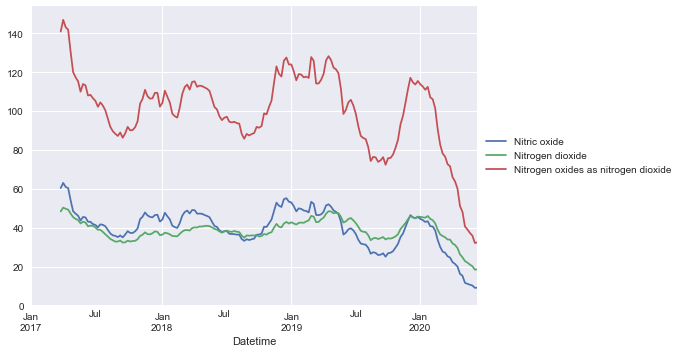

In [3]:
#concatenate all the years into a single dataset and plot the full timeline as a rolling 13 week graph
data_total = pd.concat([data_2020,data_2019,data_2018,data_2017]) #create a merged dataset of all the yearly data combined
plot = data_total.resample('W').mean().rolling(13).mean().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

In [12]:
#Create new variables to represent the lockdown date
Lockdown = datetime.datetime(2020,3,17)
print("Lockdown began in the UK on week " + Lockdown.strftime("%V"))
data_total.loc[data_total.index<Lockdown,'Lockdown']="Pre-lockdown"
data_total.loc[data_total.index>=Lockdown,'Lockdown']="Post-lockdown"

Lockdown began in the UK on week 12


Text(0.5, 0, 'Week')

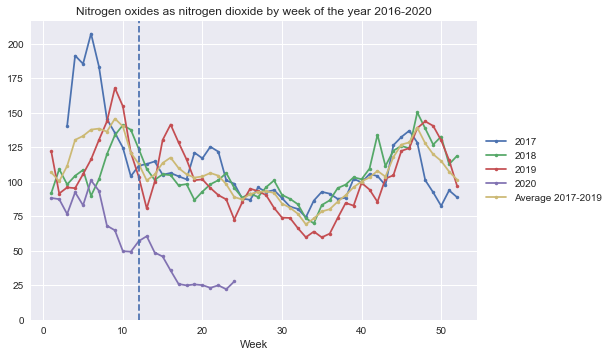

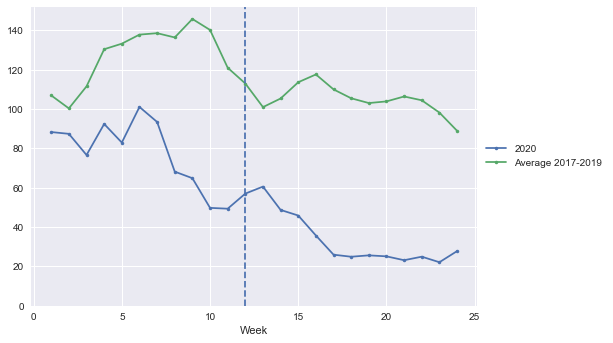

In [18]:
# plot the first 20 weeks of each of the available years graph of 'nitrogen oxides as nitrogen dioxide'
data_total_weekly = data_total.resample('W').mean().rolling(4).mean()
pivoted = data_total_weekly.pivot_table('Nitrogen oxides as nitrogen dioxide', 
                                        index=[data_total_weekly.index.week], 
                                        columns=data_total_weekly.index.year)

pivoted['Average 2017-2019'] = pivoted[[2017,2018,2019]].mean(axis=1)
pivoted.style.format(",")
pivoted.iloc[0:150].plot(marker='.')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.xlabel('Week')
plt.title('Nitrogen oxides as nitrogen dioxide by week of the year 2016-2020')
plt.ylim(0)
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
pivoted[[2020,'Average 2017-2019']].iloc[0:pivoted[2020].count()].plot(marker='.')
plt.ylim(0)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
plt.xlabel('Week')

Text(0.5, 1.0, 'Polluation (NO as NO2) by day of the week')

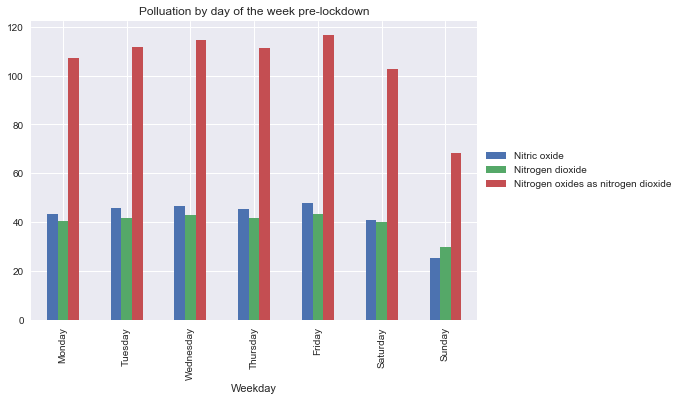

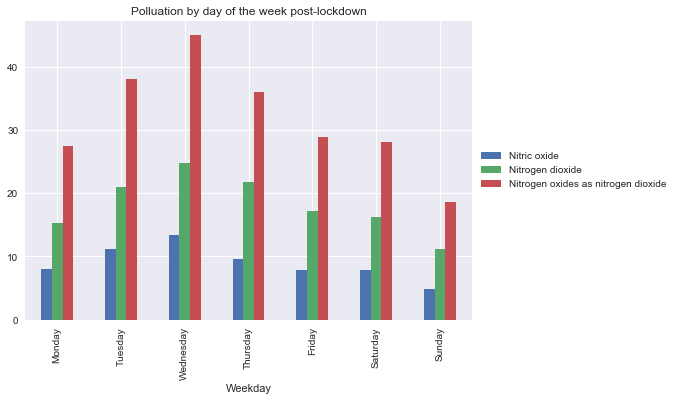

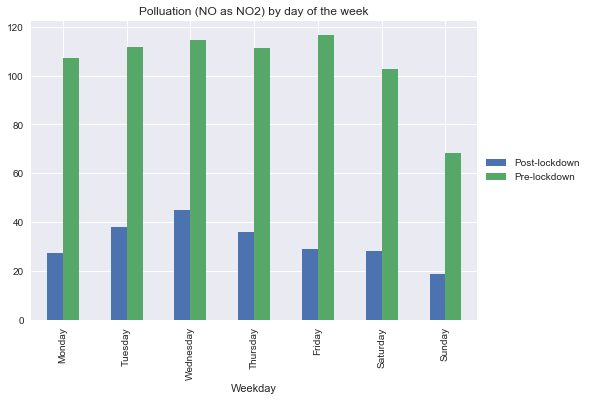

In [9]:
# resample the data to be daily by getting the average hourly reading
data_total['Weekday'] = data_total.index.strftime('%A')
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']



#create day of the week graph pre-lockdown
data_total[data_total['Lockdown']=="Pre-lockdown"].groupby('Weekday').mean().reindex(weekday).plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation by day of the week pre-lockdown')

#create day of the week graph post-lockdown
data_total[data_total['Lockdown']=="Post-lockdown"].groupby('Weekday').mean().reindex(weekday).plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation by day of the week post-lockdown')

day_pivot = data_total.pivot_table('Nitrogen oxides as nitrogen dioxide',
                                   index=data_total['Weekday'],
                                  columns=data_total['Lockdown'])
day_pivot.reindex(weekday).plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation (NO as NO2) by day of the week')

Text(0.5, 0, 'Time')

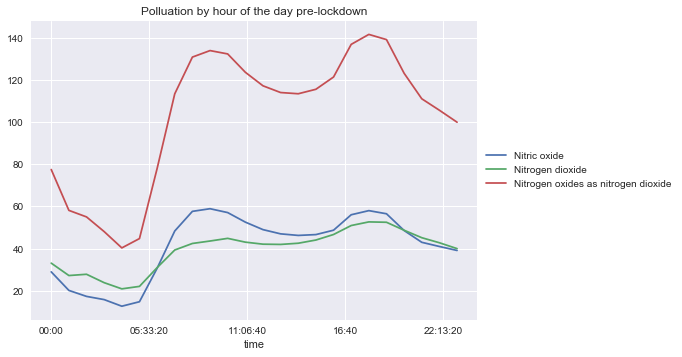

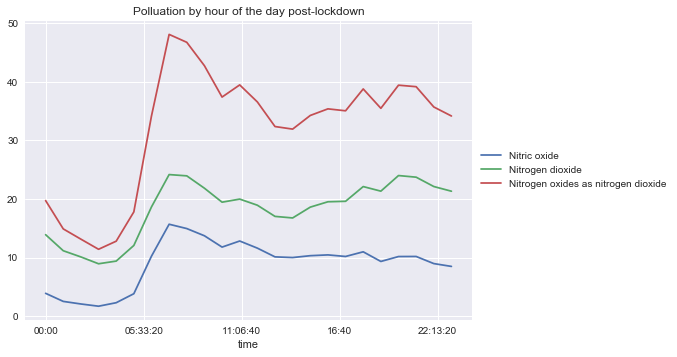

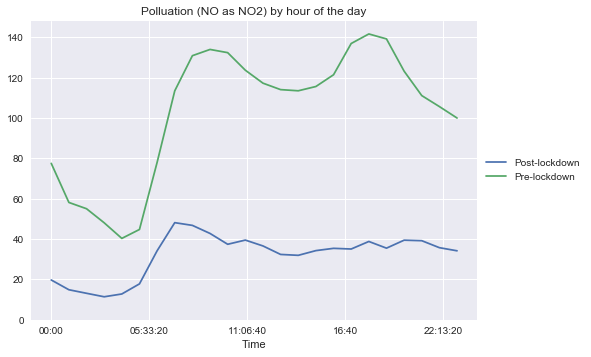

In [30]:
#plot the data by hour in the day

#create hour of the day graph pre-lockdown
data_total[data_total['Lockdown']=="Pre-lockdown"].groupby(data_total[data_total['Lockdown']=="Pre-lockdown"].index.time).mean().plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation by hour of the day pre-lockdown')

#create hour of the day graph post-lockdown
data_total[data_total['Lockdown']=="Post-lockdown"].groupby(data_total[data_total['Lockdown']=="Post-lockdown"].index.time).mean().plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation by hour of the day post-lockdown')

#create single chart of NO as NO2 pre-lockdown vs post-lockdown
hour_pivot = data_total.pivot_table('Nitrogen oxides as nitrogen dioxide',
                                    index=data_total.index.time,
                                    columns=data_total['Lockdown'])
hour_pivot.plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.title('Polluation (NO as NO2) by hour of the day')
plt.ylim(0)
plt.xlabel('Time')

Text(0.5, 0, 'Day of the month')

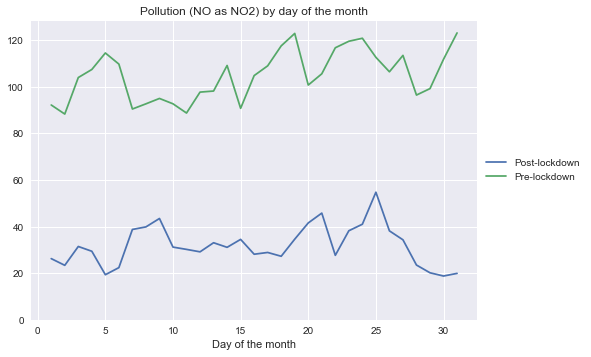

In [32]:
#plot the data by day in the month
monthday_pivot = data_total.pivot_table('Nitrogen oxides as nitrogen dioxide',
                                       index=data_total.index.day,
                                       columns=data_total['Lockdown'])
monthday_pivot.plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.ylim(0)
plt.title('Pollution (NO as NO2) by day of the month')
plt.xlabel('Day of the month')